[From the md logbook exercise:]

# logbook

as proposed by mooc module 1

## 18.05.2020
- Today I did some markdown Wohaaaa!
- I decided to write everything into this file as its easiest to start and 
splitting into multiple files can be done easily later if necessary.

As I'm already actively  using jupyter as experiment log I just copy paste some of my latest experiments here:

Does the shell work? can I install plotnine?

In [1]:
! ls

exercice_en.ipynb  exercice.ipynb	   exercice_R_fr.org
exercice_en.Rmd    exercice_python_en.org  server.timing-information.csv
exercice_fr.ipynb  exercice_python_fr.org
exercice_fr.Rmd    exercice_R_en.org


In [3]:
!pip install plotnine

     |████████████████████████████████| 4.1 MB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 396 kB/s  eta 0:00:01
     |████████████████████████████████| 20.2 MB 166 kB/s  eta 0:00:01    |████████▎                       | 5.2 MB 26.5 MB/s eta 0:00:01     |███████████████████████▎        | 14.7 MB 26.5 MB/s eta 0:00:01
     |████████████████████████████████| 10.0 MB 24.9 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 38 kB/s s eta 0:00:01    |███████████████▉                | 12.9 MB 33.9 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 12.7 MB/s eta 0:00:01     |██████████████████████████████▊ | 11.9 MB 12.7 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 9.5 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.15.2
    Uninstalling numpy-1.15.2:
      Successfully uninstalled numpy-1.15.2
  Attempting uninstall: pandas
    Found existing installation: pandas 0.22.0
    Uninstalli

In [3]:
import pandas as pd
import os
from matplotlib import pyplot as plt
#from plotnine import *

.... ok seems like the ggplot environment is still not working - so lets use matplotlib

In [5]:
df = pd.read_csv('server.timing-information.csv')
df

iteration  walltime (ms)  walltime filter update (ms)  \
0            0        9226.97                      2631.22   
1            1        6296.54                      2155.01   
2            2        6364.22                      2195.48   
3            3        6307.95                      2150.47   
4            4        6327.45                      2153.37   
..         ...            ...                          ...   
695        695        3424.46                      2205.93   
696        696        3452.03                      2199.23   
697        697        3463.87                      2201.54   
698        698        3436.69                      2200.06   
699        699        3273.05                      2042.01   

     max job walltime (ms)  min_runners  max_runners  \
0                423.62100            1            2   
1                  9.73675            2            2   
2                 10.41640            2            2   
3                  9.76071            2            2   
4                 10.22350            2            2   
..                     ...          ...          ...   
695               30.37890           12           12   
696               26.87720           12           12   
697               27.43590           12           12   
698               29.08590           12           12   
699               26.83200           12           12   

     accumulated runner idle time  \
0                         5405.35   
1                         4523.69   
2                         4675.25   
3                         4451.92   
4                         4459.78   
..                            ...   
695                      27388.90   
696                      27451.00   
697                      27655.60   
698                      27476.80   
699                      25500.30   

     corresponding pdaf state per runner runner idle time  \
0                                            3117140.0      
1                                            2206450.0      
2                                            2248530.0      
3                                            2201740.0      
4                                            2205110.0      
..                                                 ...      
695                                          2274020.0      
696                                          2263310.0      
697                                          2266300.0      
698                                          2266630.0      
699                                          2102630.0      

     pdaf slack/melissa-da slack  
0                       576.6770  
1                       487.7550  
2                       480.9440  
3                       494.5590  
4                       494.4450  
..                           ...  
695                      83.0271  
696                      82.4491  
697                      81.9473  
698                      82.4924  
699                      82.4549  

[700 rows x 9 columns]

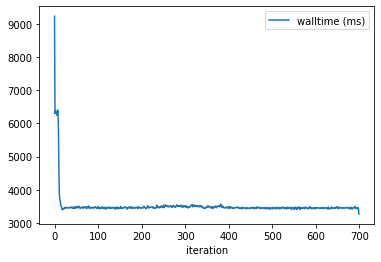

In [7]:
df.plot("iteration", "walltime (ms)")

A warmup phase is clearly visible when plotting the walltime per iteration so don't use the first lets say 50 iterations and dont use the last 10:

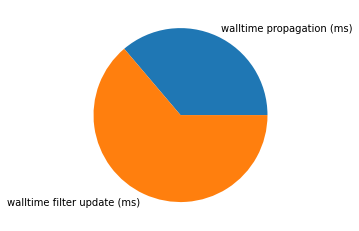

In [13]:
df['walltime propagation (ms)'] = df['walltime (ms)'] - df['walltime filter update (ms)']
plt.pie([x.mean() for x in [df['walltime propagation (ms)'][50:-10], df['walltime filter update (ms)'][50:-10]]], labels=['walltime propagation (ms)', 'walltime filter update (ms)'])
#plt.legend()
plt.show()

For our dummy case we see that the filter update takes longer than the propagation. This relation wil linverse when we use real world simulatoins that are harder to calculate than a simple addition